In [1]:
from next_step import NextStepWinsorize
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, laplace, triang, loggamma, rayleigh, kstest

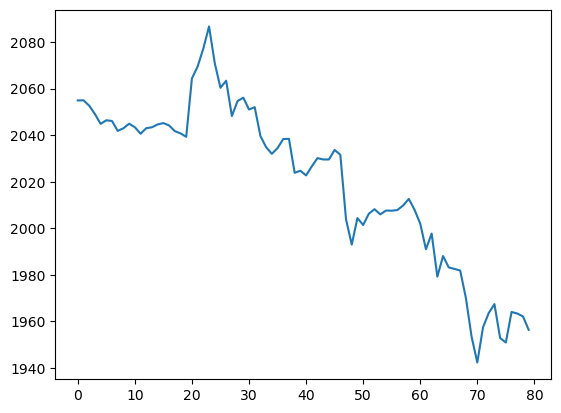

In [2]:
data = np.array(pd.read_csv('price.csv')['Ethereum'])
wins = NextStepWinsorize()

wins.fit_transform(data)
plt.plot(data)

I will start by creating it for one group, and then refine the algorithm for all.

(array([2., 0., 0., 0., 1., 2., 1., 3., 2., 2.]),
 array([-18.51 , -15.713, -12.916, -10.119,  -7.322,  -4.525,  -1.728,
          1.069,   3.866,   6.663,   9.46 ]),
 <BarContainer object of 10 artists>)

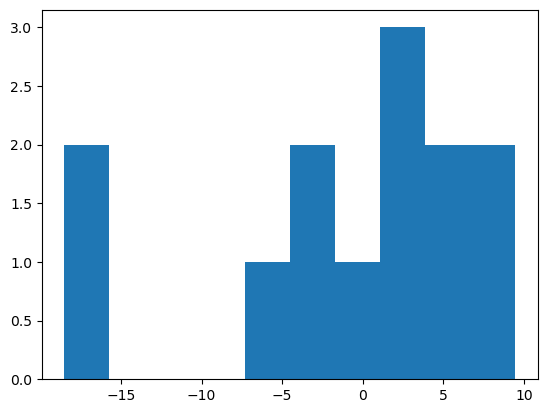

In [3]:
plt.hist(wins.next_steps[0])

Далі код по знаходженню найкращого розподілу

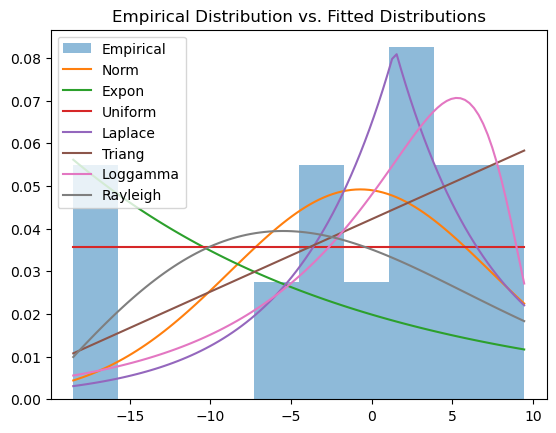

Best fit distribution: loggamma (KS statistic = 0.097375385303757, p-value = 0.9984247266425262)


In [4]:
# Generate a random sample of 13 values (replace this with your own sample)
data = wins.next_steps[0]

# List of distributions for comparison
distributions = [norm, expon, uniform, laplace, triang, loggamma, rayleigh]

# Display the empirical distribution
plt.hist(data, density=True, alpha=0.5, bins=10, label='Empirical')

best_distribution = None
best_ks_statistic = np.inf
best_ks_pvalue = 0
best_params = None
# Iterate through distributions and compare their p-values
for distribution in distributions:
    # Fit parameters for the distribution
    params = distribution.fit(data)

    # Display the probability density function
    x = np.linspace(min(data), max(data), 100)
    y = distribution.pdf(x, *params)
    plt.plot(x, y, label=f'{distribution.name.capitalize()}')

    # Perform the Kolmogorov-Smirnov test
    ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

    # Update the best distribution if a better one is found
    if ks_pvalue > best_ks_pvalue:
        best_distribution = distribution
        best_ks_statistic = ks_statistic
        best_ks_pvalue = ks_pvalue
        best_params = params

plt.legend()
plt.title('Empirical Distribution vs. Fitted Distributions')
plt.show()

print(f'Best fit distribution: {best_distribution.name} (KS statistic = {best_ks_statistic}, p-value = {best_ks_pvalue})')

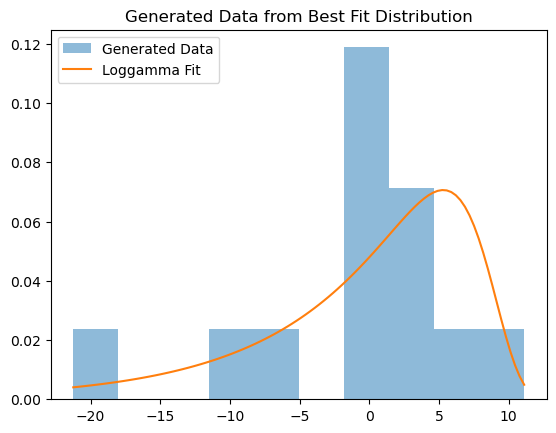

In [5]:
random_values = best_distribution.rvs(*best_params, size=13)
plt.hist(random_values, density=True, alpha=0.5, bins=10, label='Generated Data')
x = np.linspace(min(random_values), max(random_values), 100)
y = best_distribution.pdf(x, *best_params)
plt.plot(x, y, label=f'{best_distribution.name.capitalize()} Fit')
plt.legend()
plt.title('Generated Data from Best Fit Distribution')
plt.show()

This is for the unfiltered, now it needs to be for the filtered.

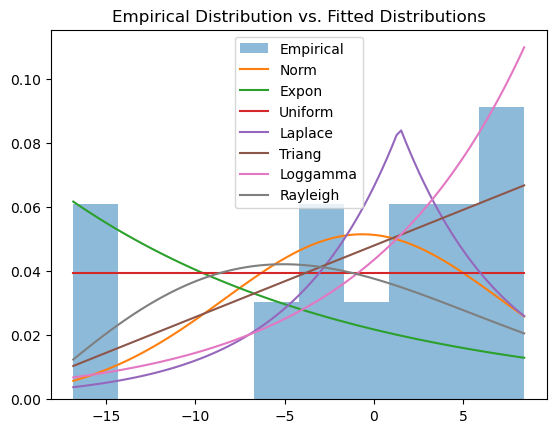

Best fit distribution: loggamma (KS statistic = 0.12547995713070798, p-value = 0.9707501043067637)


In [6]:
# Generate a random sample of 13 values (replace this with your own sample)
data = wins.winsorized_steps[0]

# List of distributions for comparison
distributions = [norm, expon, uniform, laplace, triang, loggamma, rayleigh]

# Display the empirical distribution
plt.hist(data, density=True, alpha=0.5, bins=10, label='Empirical')

best_distribution = None
best_ks_statistic = np.inf
best_ks_pvalue = 0
best_params = None
# Iterate through distributions and compare their p-values
for distribution in distributions:
    # Fit parameters for the distribution
    params = distribution.fit(data)

    # Display the probability density function
    x = np.linspace(min(data), max(data), 100)
    y = distribution.pdf(x, *params)
    plt.plot(x, y, label=f'{distribution.name.capitalize()}')

    # Perform the Kolmogorov-Smirnov test
    ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

    # Update the best distribution if a better one is found
    if ks_pvalue > best_ks_pvalue:
        best_distribution = distribution
        best_ks_statistic = ks_statistic
        best_ks_pvalue = ks_pvalue
        best_params = params

plt.legend()
plt.title('Empirical Distribution vs. Fitted Distributions')
plt.show()

print(f'Best fit distribution: {best_distribution.name} (KS statistic = {best_ks_statistic}, p-value = {best_ks_pvalue})')

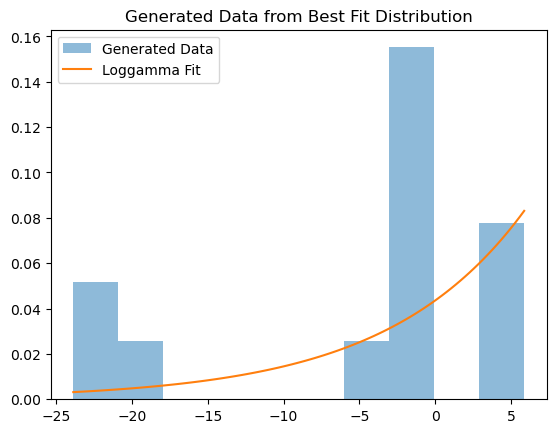

In [7]:
random_values = best_distribution.rvs(*best_params, size=13)
plt.hist(random_values, density=True, alpha=0.5, bins=10, label='Generated Data')
x = np.linspace(min(random_values), max(random_values), 100)
y = best_distribution.pdf(x, *best_params)
plt.plot(x, y, label=f'{best_distribution.name.capitalize()} Fit')
plt.legend()
plt.title('Generated Data from Best Fit Distribution')
plt.show()

Just for demonstration purposes, outputting all distributions.

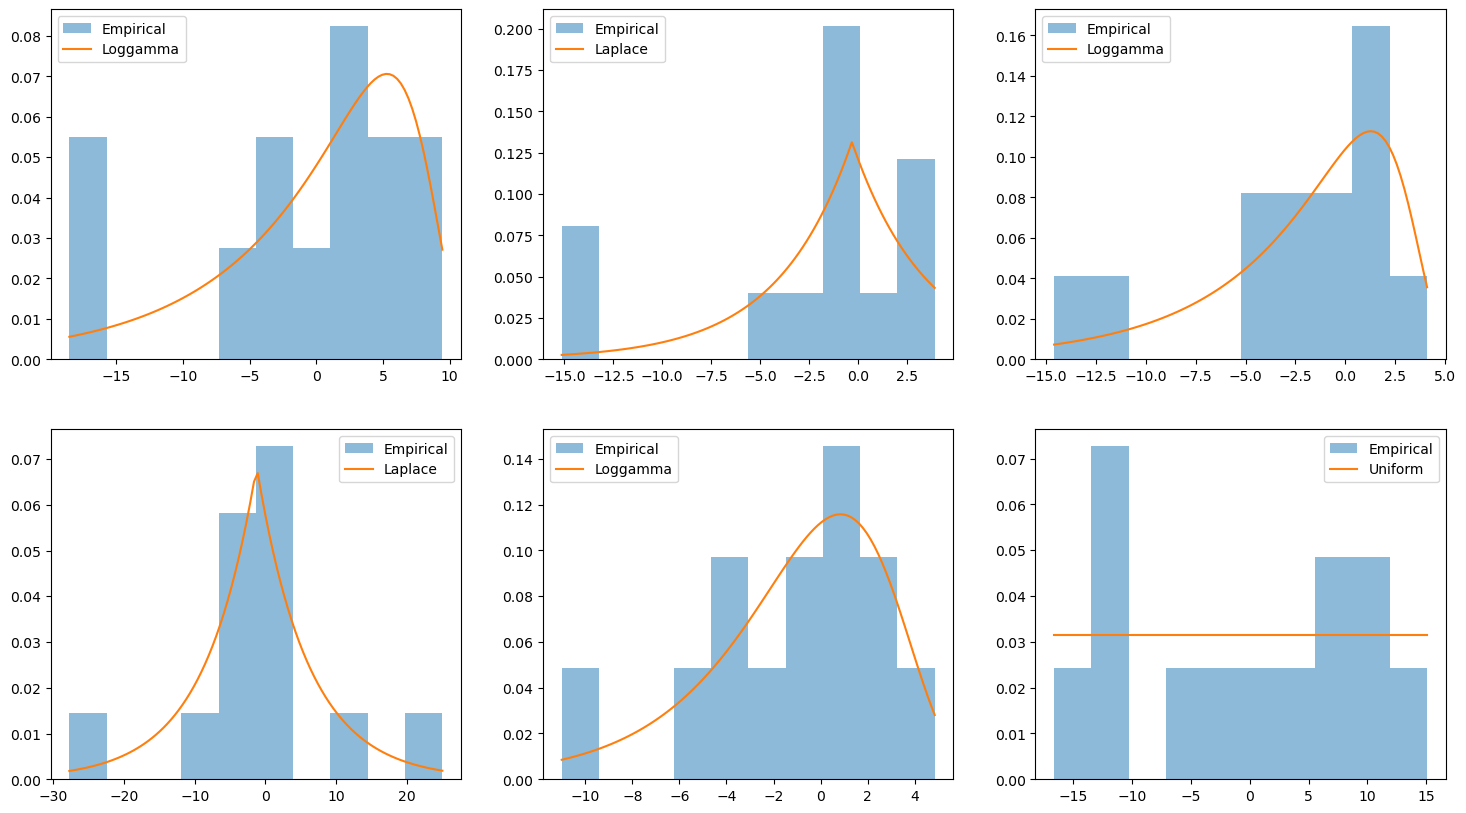

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i in range(1, 7):
    data = wins.next_steps[i-1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]

    ax.hist(data, density=True, alpha=0.5, bins=10, label='Empirical')

    best_distribution = None
    best_ks_statistic = np.inf
    best_ks_pvalue = 0
    best_params = None
    # Iterate through distributions and compare their p-values
    for distribution in distributions:
        # Fit parameters for the distribution
        params = distribution.fit(data)

        # Perform the Kolmogorov-Smirnov test
        ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

        # Update the best distribution if a better one is found
        if ks_pvalue > best_ks_pvalue:
            best_distribution = distribution
            best_ks_statistic = ks_statistic
            best_ks_pvalue = ks_pvalue
            best_params = params

    x = np.linspace(min(data), max(data), 100)
    y = best_distribution.pdf(x, *best_params)
    ax.plot(x, y, label=f'{best_distribution.name.capitalize()}')
    ax.legend()
plt.show()

вивід згенерованих

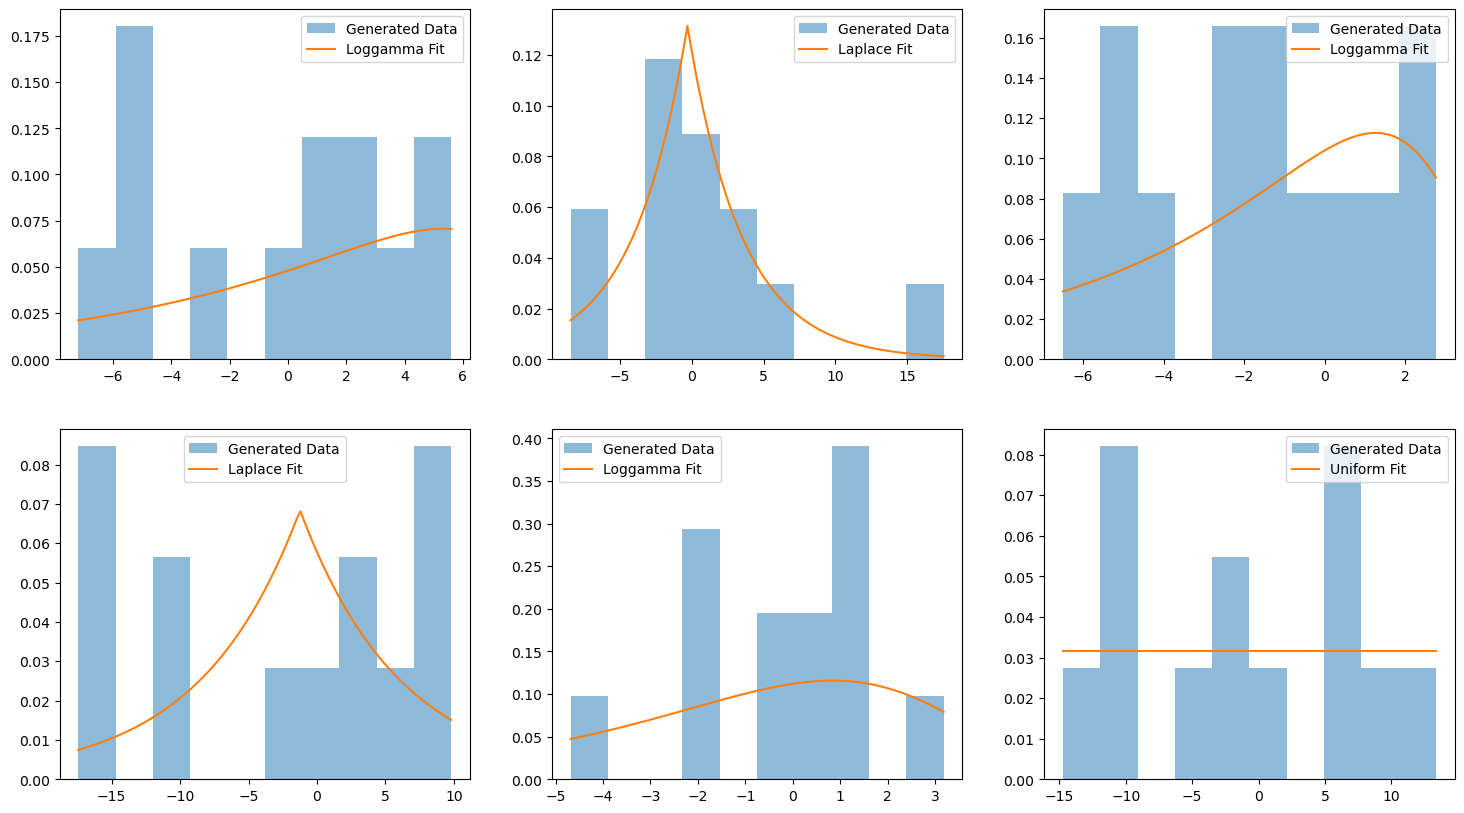

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i in range(1, 7):
    data = wins.next_steps[i-1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]

    best_distribution = None
    best_ks_statistic = np.inf
    best_ks_pvalue = 0
    best_params = None
    # Iterate through distributions and compare their p-values
    for distribution in distributions:
        # Fit parameters for the distribution
        params = distribution.fit(data)

        # Perform the Kolmogorov-Smirnov test
        ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

        # Update the best distribution if a better one is found
        if ks_pvalue > best_ks_pvalue:
            best_distribution = distribution
            best_ks_statistic = ks_statistic
            best_ks_pvalue = ks_pvalue
            best_params = params

    # Generate random values from the best-fitted distribution
    random_values = best_distribution.rvs(*best_params, size=13)
    ax.hist(random_values, density=True, alpha=0.5, bins=10, label='Generated Data')
    x = np.linspace(min(random_values), max(random_values), 100)
    y = best_distribution.pdf(x, *best_params)
    ax.plot(x, y, label=f'{best_distribution.name.capitalize()} Fit')
    ax.legend()

plt.show()

Similarly for cleansed data

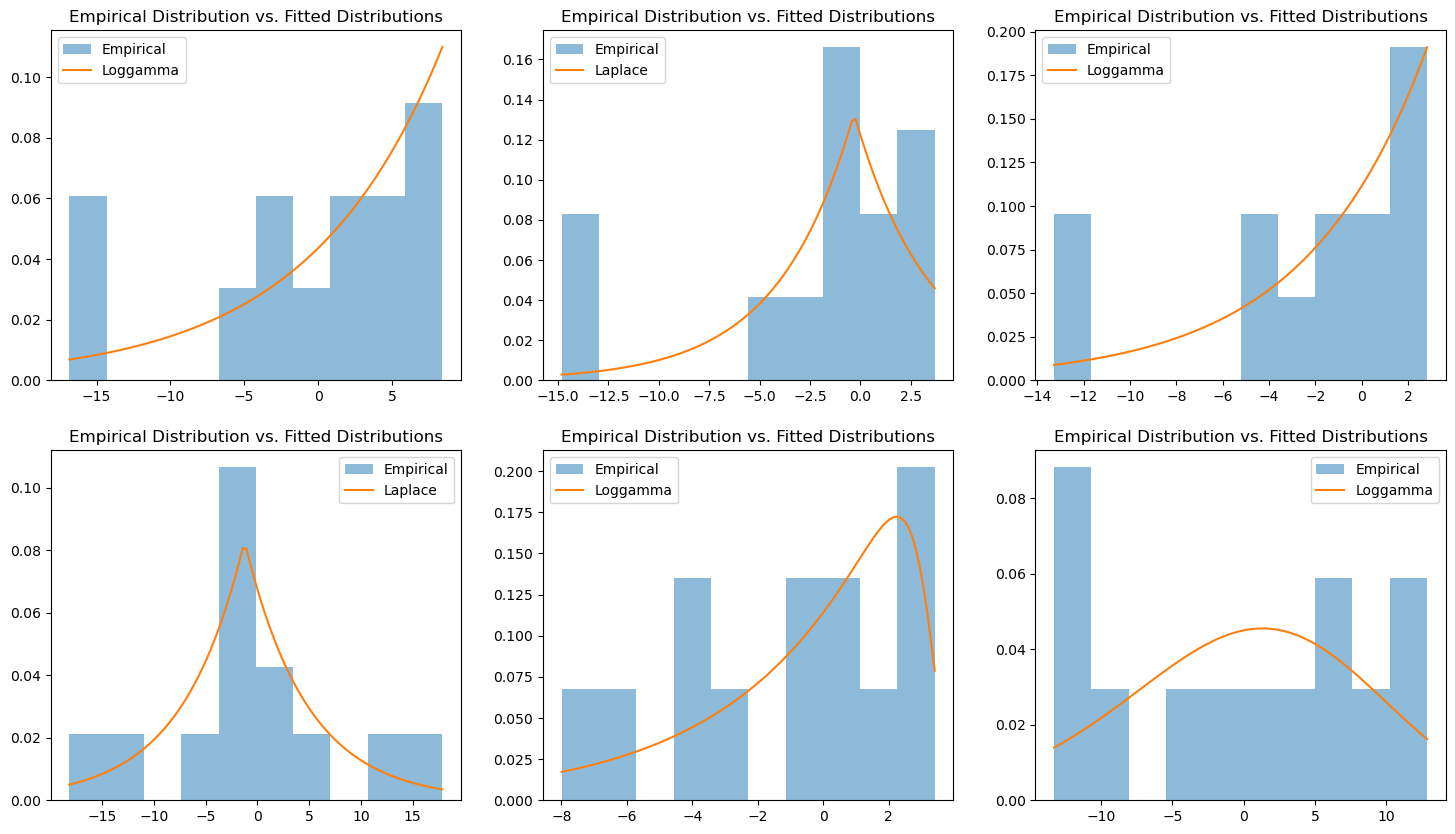

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i in range(1, 7):
    data = wins.winsorized_steps[i-1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]

    ax.hist(data, density=True, alpha=0.5, bins=10, label='Empirical')

    best_distribution = None
    best_ks_statistic = np.inf
    best_ks_pvalue = 0
    best_params = None
    # Iterate through distributions and compare their p-values
    for distribution in distributions:
        # Fit parameters for the distribution
        params = distribution.fit(data)

        # Perform the Kolmogorov-Smirnov test
        ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

        # Update the best distribution if a better one is found
        if ks_pvalue > best_ks_pvalue:
            best_distribution = distribution
            best_ks_statistic = ks_statistic
            best_ks_pvalue = ks_pvalue
            best_params = params

    x = np.linspace(min(data), max(data), 100)
    y = best_distribution.pdf(x, *best_params)
    ax.plot(x, y, label=f'{best_distribution.name.capitalize()}')
    ax.legend()
    ax.set_title('Empirical Distribution vs. Fitted Distributions')

plt.show()

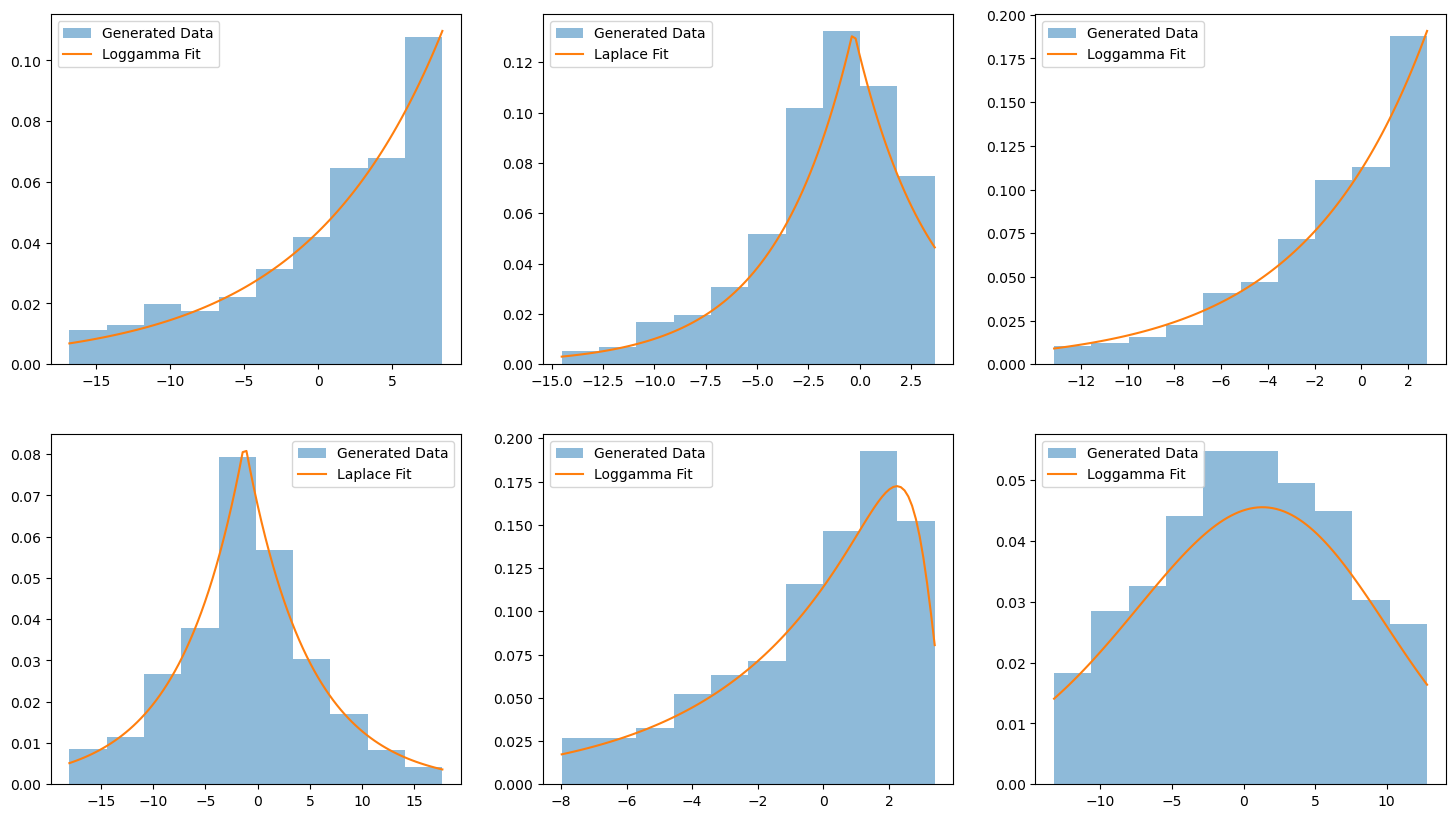

In [11]:
best_distributions = []
best_params_all = []

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i in range(1, 7):
    data = wins.winsorized_steps[i-1]

    row = (i - 1) // 3
    col = (i - 1) % 3

    ax = axes[row, col]

    best_distribution = None
    best_ks_statistic = np.inf
    best_ks_pvalue = 0
    best_params = None
    # Iterate through distributions and compare their p-values
    for distribution in distributions:
        # Fit parameters for the distribution
        params = distribution.fit(data)

        # Perform the Kolmogorov-Smirnov test
        ks_statistic, ks_pvalue = kstest(data, distribution.name, params)

        # Update the best distribution if a better one is found
        if ks_pvalue > best_ks_pvalue:
            best_distribution = distribution
            best_ks_statistic = ks_statistic
            best_ks_pvalue = ks_pvalue
            best_params = params

    # Generate random values from the best-fitted distribution
    random_values = best_distribution.rvs(*best_params, size=1000)
    # Filter out outliers, though it has no practical significance, it's for visualization purposes
    random_values = random_values[(random_values > wins.limits[i-1][0]) & (random_values < wins.limits[i-1][1])]
    ax.hist(random_values, density=True, alpha=0.5, bins=10, label='Generated Data')
    x = np.linspace(min(random_values), max(random_values), 100)
    y = best_distribution.pdf(x, *best_params)
    ax.plot(x, y, label=f'{best_distribution.name.capitalize()} Fit')
    ax.legend()

    best_distributions.append(best_distribution)
    best_params_all.append(best_params)

plt.show()

We need to create different generators for each group, so that we have correct random values, not some nonsense or identical values.

rs1 = np.random.RandomState(1)
rs2 = np.random.RandomState(2)
best_distribution.rvs(*best_params, size=10, random_state=rs1)

In [12]:
rnds = [np.random.RandomState(i**3) for i in range(6)]

Next, we simply take the first two points and generate a model.

In [13]:
# This is the development of limits to determine which group the previous change belongs to
max_limits = wins.previous_steps[:, :, 0][:, 0].copy()
min_limits = wins.previous_steps[:, :, 0][:, -1].copy()
print(min_limits)
print(max_limits)

for i in range(1, len(max_limits)):
    mean = (max_limits[i] + min_limits[i - 1]) / 2
    max_limits[i] = min_limits[i-1] = mean

max_limits[0] = np.inf
min_limits[-1] = -np.inf
print()
print(max_limits)
print(min_limits)

[  4.09   1.55  -0.31  -2.24  -5.98 -27.74]
[ 25.05   3.92   1.45  -0.58  -2.31 -10.58]

[   inf  4.005  1.5   -0.445 -2.275 -8.28 ]
[ 4.005  1.5   -0.445 -2.275 -8.28    -inf]


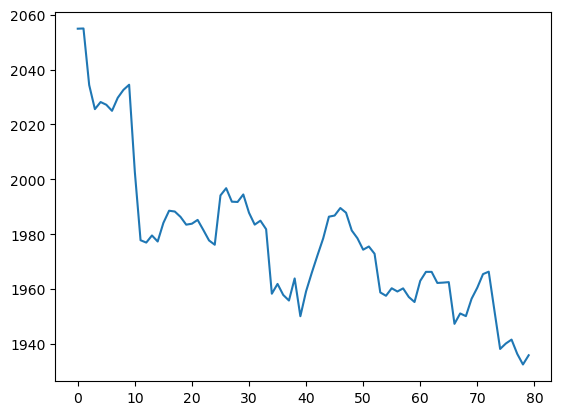

In [14]:
N = 80

generated_data = np.zeros(N)

generated_data[:2] = wins.original_data[:2]

change = generated_data[1] - generated_data[0]
for i in range(2,N):
    mask = (min_limits < change) & (change<= max_limits)
    group = np.argmax(mask)

    change = best_distributions[group].rvs(*best_params_all[group], size=1, random_state=rnds[group])[0]

    while (change <= wins.limits[group][0]) & (wins.limits[group][1] <= change):
        change = best_distributions[group].rvs(*best_params_all[group], size=1, random_state=rnds[group])[0]

    generated_data[i] = generated_data[i-1] + change

plt.plot(generated_data)

### Outlier Injection

We simply specify the probability of outliers, which we will later add using a uniform distribution.

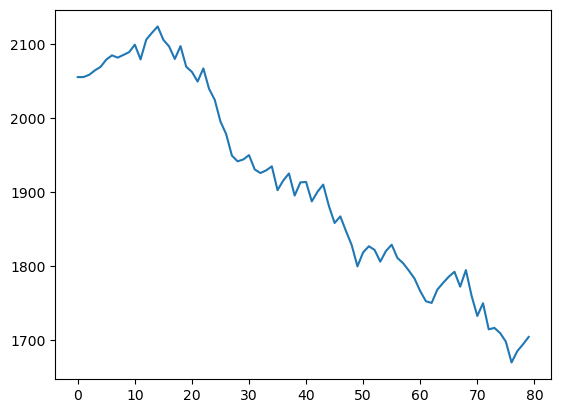

In [15]:
N = 80

generated_data = np.zeros(N)

generated_data[:2] = wins.original_data[:2]

rnd_em = np.random.RandomState(1)

prob_em = 0.15

change = generated_data[1] - generated_data[0]
for i in range(2,N):
    mask = (min_limits < change) & (change<= max_limits)
    group = np.argmax(mask)

    change = best_distributions[group].rvs(*best_params_all[group], size=1, random_state=rnds[group])[0]

    if rnd_em.uniform(0, 1) < prob_em:
        while (change <= wins.limits[group][0]) | (wins.limits[group][1] <= change):
            change = best_distributions[group].rvs(*best_params_all[group], size=1, random_state=rnds[group])[0]
    else:
        while (change >= wins.limits[group][0]) & (wins.limits[group][1] >= change): # ось додані викиди
            change = 1.2 * best_distributions[group].rvs(*best_params_all[group], size=1, random_state=rnds[group])[0]

    generated_data[i] = generated_data[i-1] + change

plt.plot(generated_data)